## SIMPLE LINEAR REGRESSION
In given task we have to predict the percentage of marks expected by the student based upon the number of hours they studied.In this task only two variables are involved.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [12]:
data=pd.read_csv('Student_scores.csv')
data1=data
print("The data is imported successfully")
data

The data is imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [13]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Data Visualization 
Now let's plot a graph of our data so that it will give us clear idea about data.

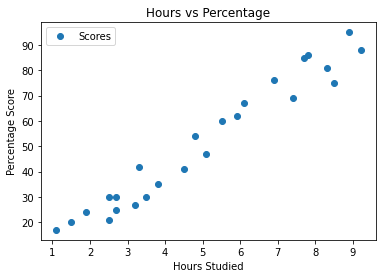

In [14]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

#### Above Data Show the Hours Studied is depends on percentage score.& Data is highly correlated with each other.

## Linear Regression Model

Now we prepare the data and split it in test data

In [16]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

### Training the model

In [20]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [23]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

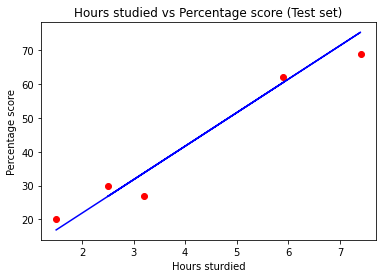

In [25]:
# Visualising the Test set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, regressor.predict(x_test), color = 'blue')
plt.title('Hours studied vs Percentage score (Test set)')
plt.xlabel('Hours sturdied')
plt.ylabel('Percentage score')
plt.show()

### Checking the accuracy scores for training and test set

In [26]:
print('Test Score')
print(regressor.score(x_test, y_test))
print('Training Score')
print(regressor.score(x_train, y_train))

Test Score
0.9454906892105356
Training Score
0.9515510725211552


#### Now we make predictions

In [28]:
data= pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [29]:
#Let's predict the score for 9.25 hpurs
print('Score of student who studied for 9.25 hours a dat', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a dat [93.69173249]


#### Model Evaluation Metrics

In [31]:
#Checking the efficiency of model
mean_squ_error = mean_squared_error(y_test, y_pred)
mean_abs_error = mean_absolute_error(y_test, y_pred)
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)

Mean Squred Error: 21.5987693072174
Mean absolute Error: 4.183859899002975
